In [36]:
import numpy as np
#if this fails, you need to put the case_studies.py file in the same folder
from case_studies import *

In [37]:
from scipy.optimize import minimize
import time

#These are the example optimizers you should evaluate this week.
#These ar eoptimizers implemented in scipy.
#they take as first 2 or 3 arguments the function f, its gradient df and sometimes its hessian Hf.
#the next parameters are all the same: x0 is the starting point, max_iterations the stopping criterion for iterations
#and epsilon the precision tolerance to be reached. 
#Note: epsilon is interpreted slightly differently across algorithms, and some algorithms might not reach the tolerance
#and stop early.
def scipy_bfgs(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    start_time=time.time()
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    result = minimize(logging_f, x0, method="BFGS", jac=df, tol=epsilon,options={'maxiter':max_iterations, 'gtol':epsilon})
    runtime = time.time() - start_time
    return np.array(xs), np.array(grad_norms), runtime, result.success

def scipy_newton(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    start_time=time.time()
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    result = minimize(logging_f, x0, method="Newton-CG", jac=df, hess=Hf, tol=epsilon,options={'maxiter':max_iterations,'xtol':epsilon})
    runtime = time.time() - start_time
    return np.array(xs), np.array(grad_norms), runtime, result.success

def scipy_trust_region(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    start_time=time.time()
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    result = minimize(logging_f, x0, method="trust-exact", jac=df, hess=Hf, tol=epsilon,options={'maxiter':max_iterations})
    runtime = time.time() - start_time
    return np.array(xs), np.array(grad_norms), runtime, result.success

In [51]:
%matplotlib 

import matplotlib.pyplot as plt


def evaluate_optimizer(optimizer, f, df, Hf, x0, max_iterations, epsilon, function_name):
    xs, grad_norms, runtime, success = optimizer(f, df, Hf, x0, max_iterations, epsilon)
    optimal = x_opt(function_name, len(x0))  # get the optimized point
    final_x = xs[-1]
    final_value = f(final_x)
    final_gradient_norm = grad_norms[-1]
    distance_to_optimum = np.linalg.norm(final_x - optimal)

    print(f"Optimizer: {optimizer.__name__}, Function: {function_name}")
    print(f"Final solution point: {final_x}")
    print(f"Distance to optimum: {distance_to_optimum}")
    print(f"Number of function evaluations: {len(grad_norms)}")
    print(f"Final function value: {final_value}")
    print(f"Final gradient norm: {final_gradient_norm}")
    print(f"Convergence success: {success}")
    print(f"Runtime: {runtime:.6f} seconds\n")

    # plot the process of reaching tolerance
    plt.plot(grad_norms, label=optimizer.__name__)
    plt.yscale('log')  # in log -- TODO explain
    plt.xlabel("Iterations")
    plt.ylabel("Gradient Norm (log scale)")
    plt.title(f"Convergence of {optimizer.__name__} on {function_name}")
    plt.legend()



Using matplotlib backend: module://matplotlib_inline.backend_inline


In [49]:
# f2
# Verify (1,1) is a minimum
x_min = np.array([1, 1])
grad_f2 = df2(x_min)
hessian_f2 = Hf2(x_min)

print("Rosenbrock function f2:")
print(f"Gradient at (1,1): {grad_f2}")
print(f"Hessian at (1,1):\n{hessian_f2}")

# Hessian eigenvalues to check positive definiteness
eigenvalues = np.linalg.eigvals(hessian_f2)
print(f"Hessian Eigenvalues: {eigenvalues}")
print("Since all eigenvalues are positive, (1,1) is a local minimum.\n")


Rosenbrock function f2:
Gradient at (1,1): [0 0]
Hessian at (1,1):
[[ 802 -400]
 [-400  200]]
Hessian Eigenvalues: [1.00160064e+03 3.99360767e-01]
Since all eigenvalues are positive, (1,1) is a local minimum.



In [40]:
# f3

# Check positive definiteness for |x| < 1/epsilon
x_test = np.array([1e-5, -1e-5])  # Small values
hessian_f3 = Hf3(x_test)

print("Log-Ellipsoid function f3:")
print(f"Hessian at {x_test}:\n{hessian_f3}")
eigenvalues_f3 = np.linalg.eigvals(hessian_f3)
print(f"Hessian Eigenvalues: {eigenvalues_f3}")
print("Since all eigenvalues are positive, Hessian is positive definite in the given range.\n")


Log-Ellipsoid function f3:
Hessian at [ 1.e-05 -1.e-05]:
[[1.99799601e+04 3.99200401e+01]
 [3.99200401e+01 1.99400800e+07]]
Hessian Eigenvalues: [   19979.96001994 19940079.97998016]
Since all eigenvalues are positive, Hessian is positive definite in the given range.



In [44]:
# f5
# Verify x=0 is a global minimum but second-order conditions fail
x_zero = np.zeros(3)  # Example in 3D
grad_f5 = df5(x_zero)
hessian_f5 = Hf5(x_zero)

print("Sum of Different Powers function f5:")
print(f"Gradient at x=0: {grad_f5}")
print("Since the Gradient is all zero, and f5(x) >= 0, f5(x)=0, then x=0 is a minimum")
print(f"Hessian at x=0:\n{hessian_f5}")
print("Since the Hessian contains zero entries, it's not positive definite, so second-order conditions do not hold.")


Sum of Different Powers function f5:
Gradient at x=0: [0. 0. 0.]
Since the Gradient is all zero, and f5(x) >= 0, f5(x)=0, then x=0 is a minimum
Hessian at x=0:
[[2. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Since the Hessian contains zero entries, it's not positive definite, so second-order conditions do not hold.


Optimizer: scipy_bfgs, Function: f1
Final solution point: [0.00000000e+00 2.71050543e-20]
Distance to optimum: 2.710505431213761e-20
Number of function evaluations: 6
Final function value: 7.346839692639297e-37
Final gradient norm: 1e-15
Convergence success: True
Runtime: 0.002596 seconds

Optimizer: scipy_newton, Function: f1
Final solution point: [2.22044605e-16 2.16840434e-19]
Distance to optimum: 2.2204471080412447e-16
Number of function evaluations: 3
Final function value: 4.935082635034613e-32
Final gradient norm: 1e-15
Convergence success: True
Runtime: 0.001234 seconds

Optimizer: scipy_trust_region, Function: f1
Final solution point: [-2.22044605e-16  0.00000000e+00]
Distance to optimum: 2.220446049250313e-16
Number of function evaluations: 3
Final function value: 4.930380657631324e-32
Final gradient norm: 1e-15
Convergence success: True
Runtime: 0.000953 seconds



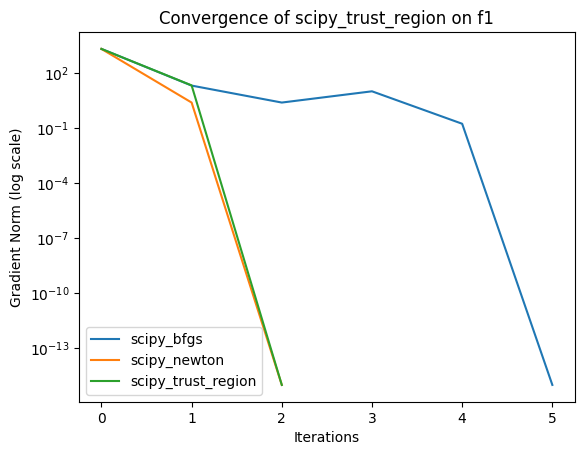

In [52]:
# f1
x0 = np.array([-1.2,1.0])
max_iterations = 1000
epsilon = 1.e-10
evaluate_optimizer(scipy_bfgs, f1, df1, Hf1, x0, max_iterations, epsilon, "f1")
evaluate_optimizer(scipy_newton, f1, df1, Hf1, x0, max_iterations, epsilon, "f1")
evaluate_optimizer(scipy_trust_region, f1, df1, Hf1, x0, max_iterations, epsilon, "f1")


Optimizer: scipy_bfgs, Function: f2
Final solution point: [1. 1.]
Distance to optimum: 1.2351795229165945e-12
Number of function evaluations: 41
Final function value: 4.350946175749837e-25
Final gradient norm: 1.6175977005641624e-11
Convergence success: True
Runtime: 0.007472 seconds

Optimizer: scipy_newton, Function: f2
Final solution point: [1. 1.]
Distance to optimum: 8.119790391781e-10
Number of function evaluations: 107
Final function value: 1.3165126612350354e-19
Final gradient norm: 3.242734736700256e-10
Convergence success: True
Runtime: 0.006415 seconds

Optimizer: scipy_trust_region, Function: f2
Final solution point: [1. 1.]
Distance to optimum: 0.0
Number of function evaluations: 27
Final function value: 0.0
Final gradient norm: 1e-15
Convergence success: True
Runtime: 0.003337 seconds



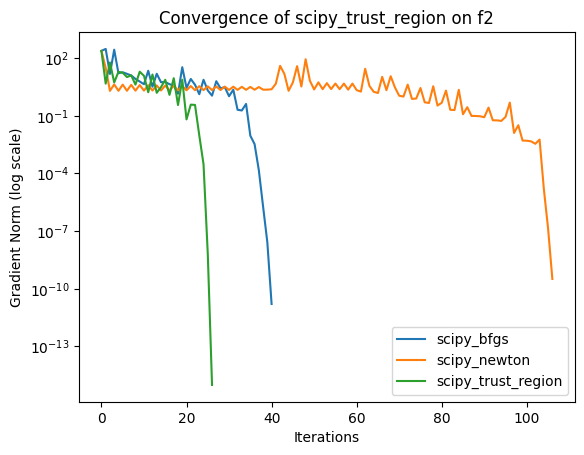

In [16]:
# f2
x0 = np.array([-1.2,1.0])
max_iterations = 1000
epsilon = 1.e-10
evaluate_optimizer(scipy_bfgs, f2, df2, Hf2, x0, max_iterations, epsilon, "f2")
evaluate_optimizer(scipy_newton, f2, df2, Hf2, x0, max_iterations, epsilon, "f2")
evaluate_optimizer(scipy_trust_region, f2, df2, Hf2, x0, max_iterations, epsilon, "f2")


Optimizer: scipy_bfgs, Function: f3
Final solution point: [-1.27419376e-16  5.59530331e-17 -3.51209746e-17 -1.62978429e-17
 -1.83171165e-17 -1.25104259e-17 -2.66312000e-18  1.86976268e-17
 -2.35752933e-17  1.86112899e-17  1.69295588e-17 -3.81375238e-18
 -2.71342014e-18  4.01790685e-18 -9.05231316e-18  4.68137102e-18
  1.44992723e-19 -1.39795728e-18  2.48966474e-18  1.29454160e-18
 -2.98300474e-18 -6.65561203e-19  1.09343834e-18  4.63951385e-18
 -7.06573468e-19  5.14092975e-19  2.80461838e-18 -1.66465571e-18
  7.36386914e-20  2.00647346e-20]
Distance to optimum: 1.5198116911532103e-16
Number of function evaluations: 175
Final function value: 5.260318735134411e-28
Final gradient norm: 4.351287825487819e-11
Convergence success: True
Runtime: 0.038208 seconds

Optimizer: scipy_newton, Function: f3
Final solution point: [ 8.00580895e-002  4.05403908e-002  1.70818602e-002  5.69714910e-003
  1.41123261e-003  2.39357085e-004  2.50518008e-005  1.41610187e-006
  3.64271775e-008  3.41900600e-010 

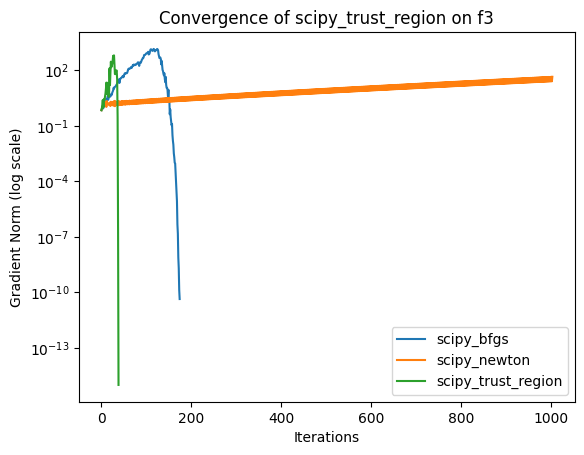

In [17]:
# f3
x0 = np.ones(30)
max_iterations = 1000
epsilon = 1.e-10

evaluate_optimizer(scipy_bfgs, f3, df3, Hf3, x0, max_iterations, epsilon, "f3")
evaluate_optimizer(scipy_newton, f3, df3, Hf3, x0, max_iterations, epsilon, "f3")
evaluate_optimizer(scipy_trust_region, f3, df3, Hf3, x0, max_iterations, epsilon, "f3")



Optimizer: scipy_bfgs, Function: f4
Final solution point: [0.00190933 0.00190933]
Distance to optimum: 3.468166938038847e-13
Number of function evaluations: 14
Final function value: 1.22031947899206e-05
Final gradient norm: 2.9183616200786355e-12
Convergence success: True
Runtime: 0.007322 seconds

Optimizer: scipy_newton, Function: f4
Final solution point: [0.00190933 0.00190933]
Distance to optimum: 1.1857525003118021e-11
Number of function evaluations: 8
Final function value: 1.2203194789920608e-05
Final gradient norm: 9.977762840817625e-11
Convergence success: True
Runtime: 0.002451 seconds

Optimizer: scipy_trust_region, Function: f4
Final solution point: [0.00190933 0.00190933]
Distance to optimum: 1.1857524696459338e-11
Number of function evaluations: 9
Final function value: 1.2203194789920598e-05
Final gradient norm: 9.977761920841575e-11
Convergence success: True
Runtime: 0.002604 seconds



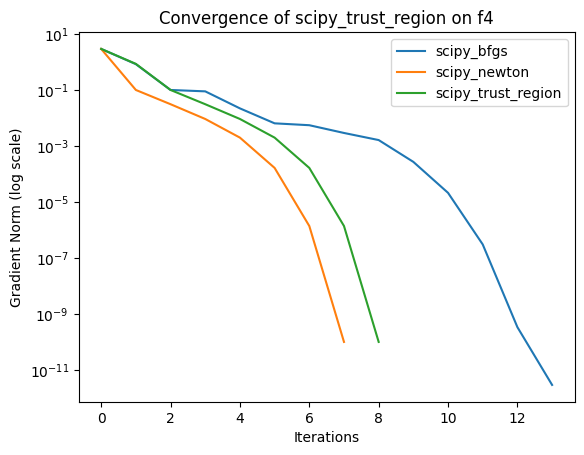

In [18]:
# f4
x0 = np.ones(2)
max_iterations = 1000
epsilon = 1.e-10
evaluate_optimizer(scipy_bfgs, f4, df4, Hf4, x0, max_iterations, epsilon, "f4")
evaluate_optimizer(scipy_newton, f4, df4, Hf4, x0, max_iterations, epsilon, "f4")
evaluate_optimizer(scipy_trust_region, f4, df4, Hf4, x0, max_iterations, epsilon, "f4")


Optimizer: scipy_bfgs, Function: f5
Final solution point: [-1.67428290e-34  2.78176383e-04]
Distance to optimum: 0.0002781763825890999
Number of function evaluations: 28
Final function value: 5.987989374155378e-15
Final gradient norm: 8.610349043182954e-11
Convergence success: True
Runtime: 0.008359 seconds

Optimizer: scipy_newton, Function: f5
Final solution point: [1.14875092e-17 5.78999678e-03]
Distance to optimum: 0.005789996775284392
Number of function evaluations: 13
Final function value: 1.1238627770843456e-09
Final gradient norm: 7.764168587324603e-07
Convergence success: True
Runtime: 0.002116 seconds

Optimizer: scipy_trust_region, Function: f5
Final solution point: [0.         0.00020049]
Distance to optimum: 0.0002004857732144782
Number of function evaluations: 22
Final function value: 1.6156014687713109e-15
Final gradient norm: 3.2233737942950246e-11
Convergence success: True
Runtime: 0.007456 seconds



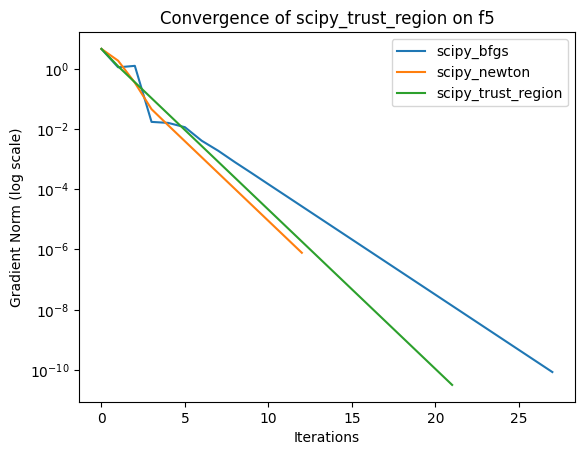

In [19]:
# f5
x0 = np.ones(2)
max_iterations = 1000
epsilon = 1.e-10

evaluate_optimizer(scipy_bfgs, f5, df5, Hf5, x0, max_iterations, epsilon, "f5")
evaluate_optimizer(scipy_newton, f5, df5, Hf5, x0, max_iterations, epsilon, "f5")
evaluate_optimizer(scipy_trust_region, f5, df5, Hf5, x0, max_iterations, epsilon, "f5")


In [ ]:
#example usage of the algorithms
#the output is a list of points evaluated on the function as well as the gradient norms at that point
#this algorithms has the first three arguments functions for function value, gradient and Hessian.
#For the 5 functions, those are named f1-f5 etc and can be found in the case_studies.py file

# x0=np.ones(2)
# xs,grad_norms = scipy_trust_region(f4,df4,Hf4,x0, 1000, 1.e-10)
# the optimal point for a given function and dimensionality is stored in the package as well for at least 15 decimals precision
# optimal = x_opt("f4", 2)
# print("final solution point:", xs[-1])
# print("distance of x from optimum", np.linalg.norm(xs[-1]-optimal))
# print("number of function evaluations:", len(grad_norms))
# print("final function value:", f4(xs[-1]))
# print("final gradient norm:", grad_norms[-1])

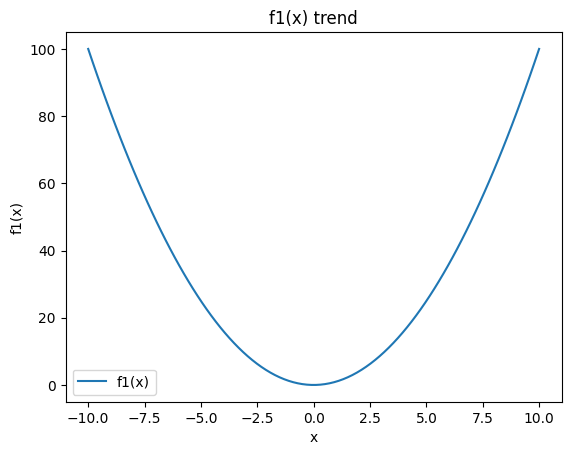

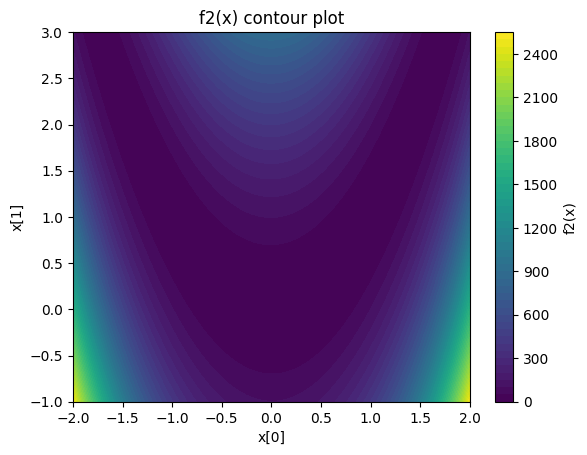

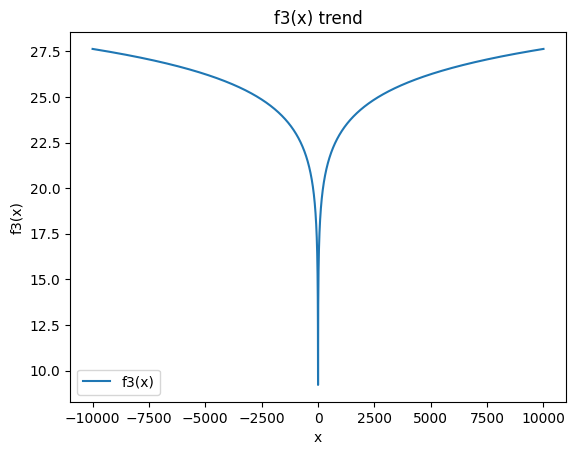

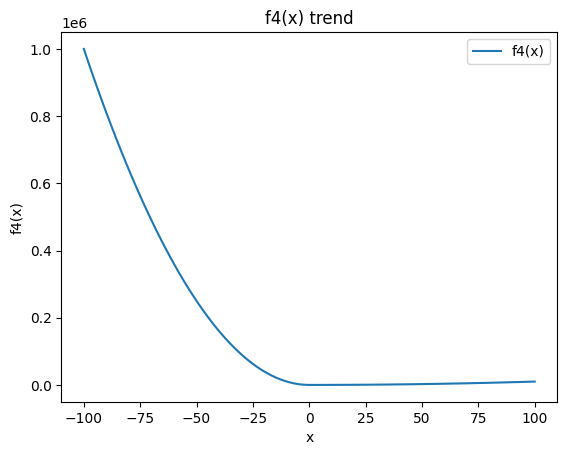

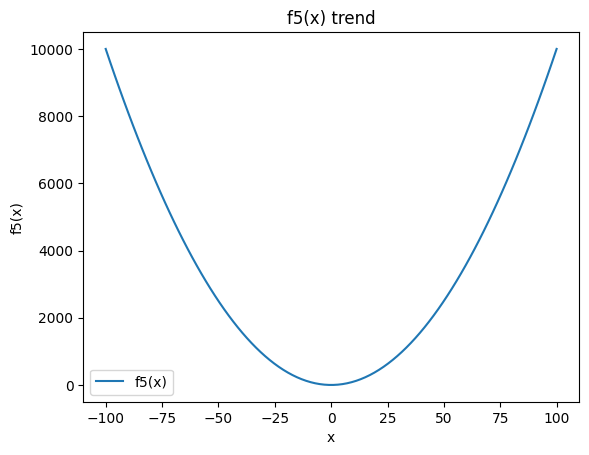

In [20]:
## additional experiments: get a big picture of the functions f1...f5

import numpy as np
import matplotlib.pyplot as plt

######f1
def f1(x, alpha=1000):
    w = alpha**(np.linspace(0, 1, len(x)))
    return np.sum(w * x**2)

x_values = np.linspace(-10, 10, 100)
y_values = [f1(np.array([x])) for x in x_values]

plt.plot(x_values, y_values, label='f1(x)')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.title('f1(x) trend')
plt.legend()
plt.show()

#####f2
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f2(np.array([xi, yi])) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f2(x)')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.title('f2(x) contour plot')
plt.show()

######f3
x_values = np.linspace(-10000, 10000, 10000)
y_values = [f3(np.array([x])) for x in x_values]

plt.plot(x_values, y_values, label='f3(x)')
plt.xlabel('x')
plt.ylabel('f3(x)')
plt.title('f3(x) trend')
plt.legend()
plt.show()

######f4
x_values = np.linspace(-100, 100, 100)
y_values = [f4(np.array([x]), q=1000) for x in x_values]

plt.plot(x_values, y_values, label='f4(x)')
plt.xlabel('x')
plt.ylabel('f4(x)')
plt.title('f4(x) trend')
plt.legend()
plt.show()

######f5
x_values = np.linspace(-100, 100, 100)
y_values = [f5(np.array([x])) for x in x_values]

plt.plot(x_values, y_values, label='f5(x)')
plt.xlabel('x')
plt.ylabel('f5(x)')
plt.title('f5(x) trend')
plt.legend()
plt.show()

In [25]:
### f1
max_iterations = 1000
epsilon = 1.e-10
import pandas as pd

def evaluate_optimizer(optimizer, f, df, Hf, x0_list, max_iterations, epsilon, function_name):
    all_runtimes = []
    all_final_errors = []
    all_iterations = []
    success_count = 0

    for x0 in x0_list:
        start_time = time.time()
        xs, grad_norms, runtime, success = optimizer(f, df, Hf, x0, max_iterations, epsilon)
        end_time = time.time()
        runtime = end_time - start_time

        optimal = x_opt(function_name, len(x0))  # Get the optimal solution
        final_x = xs[-1]
        distance_to_optimum = np.linalg.norm(final_x - optimal)

        all_runtimes.append(runtime)
        all_final_errors.append(distance_to_optimum)
        all_iterations.append(len(grad_norms))
        if success:
            success_count += 1

    # Compute averages
    avg_runtime = np.mean(all_runtimes)
    avg_final_error = np.mean(all_final_errors)
    avg_iterations = np.mean(all_iterations)
    success_rate = success_count / len(x0_list) * 100  # Percentage of successful runs

    return [optimizer.__name__, avg_runtime, avg_iterations, avg_final_error, success_rate]

def evaluate_optimizer_plt(optimizer, f, df, Hf, x0_list, max_iterations, epsilon, function_name):
    all_runtimes = []
    all_final_errors = []
    all_iterations = []
    
    plt.figure(figsize=(8, 6))
    
    for x0 in x0_list:
        start_time = time.time()
        xs, grad_norms, runtime, success = optimizer(f, df, Hf, x0, max_iterations, epsilon)
        end_time = time.time()
        runtime = end_time - start_time
        
        optimal = x_opt(function_name, len(x0))  # 获取最优点
        final_x = xs[-1]
        final_value = f(final_x)
        final_gradient_norm = grad_norms[-1]
        distance_to_optimum = np.linalg.norm(final_x - optimal)
        
        all_runtimes.append(runtime)
        all_final_errors.append(distance_to_optimum)
        all_iterations.append(len(grad_norms))
        
        plt.plot(grad_norms, label=f"{optimizer.__name__}, x0={x0}")
    
    plt.yscale('log')  # 对数尺度
    plt.xlabel("Iterations")
    plt.ylabel("Gradient Norm (log scale)")
    plt.title(f"Convergence of {optimizer.__name__} on {function_name}")
    plt.legend()
    plt.show()
    
    avg_runtime = np.mean(all_runtimes)
    avg_final_error = np.mean(all_final_errors)
    avg_iterations = np.mean(all_iterations)
    
    print(f"Optimizer: {optimizer.__name__}, Function: {function_name}")
    print(f"Average runtime: {avg_runtime:.6f} seconds")
    print(f"Average final error: {avg_final_error:.6f}")
    print(f"Average number of iterations: {avg_iterations:.2f}")

# 生成不同的 x0 初值，使用正态分布
np.random.seed(42)  # 设定随机种子，保证结果可复现
def generate_x0_samples(dim, num_samples, mean=0, std=1):
    return [np.random.normal(mean, std, size=dim) for _ in range(num_samples)]

optimizers = [scipy_bfgs, scipy_newton, scipy_trust_region]
dimensions = [2, 10, 50]
alpha_values = [10, 100, 1000]
num_samples = 5  # Number of x0 samples per setting

results = []

for d in dimensions:
    for alpha in alpha_values:
        x0_samples = generate_x0_samples(d, num_samples)
        for optimizer in optimizers:
            result = evaluate_optimizer(
                optimizer, 
                lambda x: f1(x, alpha), 
                lambda x: df1(x, alpha), 
                lambda x: Hf1(x, alpha), 
                x0_samples, 
                max_iterations=1000, 
                epsilon=1e-8, 
                function_name="f1"
            )
            results.append([d, alpha] + result)

# Convert results to a DataFrame and print it
columns = ["Dim", "Alpha", "Optimizer", "Avg Runtime (s)", "Avg Iterations", "Avg Final Error", "Success Rate (%)"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_string(index=False))



 Dim  Alpha          Optimizer  Avg Runtime (s)  Avg Iterations  Avg Final Error  Success Rate (%)
   2     10         scipy_bfgs         0.003025             7.0     5.527578e-12             100.0
   2     10       scipy_newton         0.000690             3.4     7.979897e-18             100.0
   2     10 scipy_trust_region         0.002330             2.4     1.352532e-16             100.0
   2    100         scipy_bfgs         0.000679             7.2     7.384035e-12             100.0
   2    100       scipy_newton         0.000466             3.4     2.220649e-17             100.0
   2    100 scipy_trust_region         0.000454             2.6     1.490327e-16             100.0
   2   1000         scipy_bfgs         0.000506             5.4     1.222485e-16             100.0
   2   1000       scipy_newton         0.000420             3.4     4.484260e-17             100.0
   2   1000 scipy_trust_region         0.000366             2.6     8.881784e-17             100.0
  10     1